In [1]:
import vk
from datetime import date
import matplotlib.pyplot as plt
import random
import time

In [2]:
with open('tkn.txt','r') as text:
    tkn = (text.readline())[:-1]
session = vk.Session(access_token=tkn)

In [3]:
vk_api = vk.API(session)
bdatesDb, gendersDb  = [],[]
i = 0
while i < 37:
    res = vk_api.groups.getMembers(version=5.9,group_id='32342123',fields=('bdate','sex'),count=1000, offset=i)
    for el in res.get('users'):
        bdatesDb.append(el.get('bdate'))
    for el in res.get('users'):
        gendersDb.append(el.get('sex'))
    time.sleep(0.2)
    i += 1
males   = 0
females = 0
for el in gendersDb:
    if el == 1:
        females += 1
    elif el == 2:
        males += 1 
    else:
        continue
# Чистим bdates от None и эл-ов без года рождения
bdates = [el.split('.') for el in bdatesDb if (el != None) and (len(el) >= 8)]

[21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 50, 52, 60, 101, 115, 116]
[46, 185, 481, 333, 582, 1485, 2086, 2379, 1432, 1116, 425, 339, 185, 111, 111, 148, 96, 111, 111, 37, 1, 37, 37, 37, 37, 37]


/home/rostislav/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


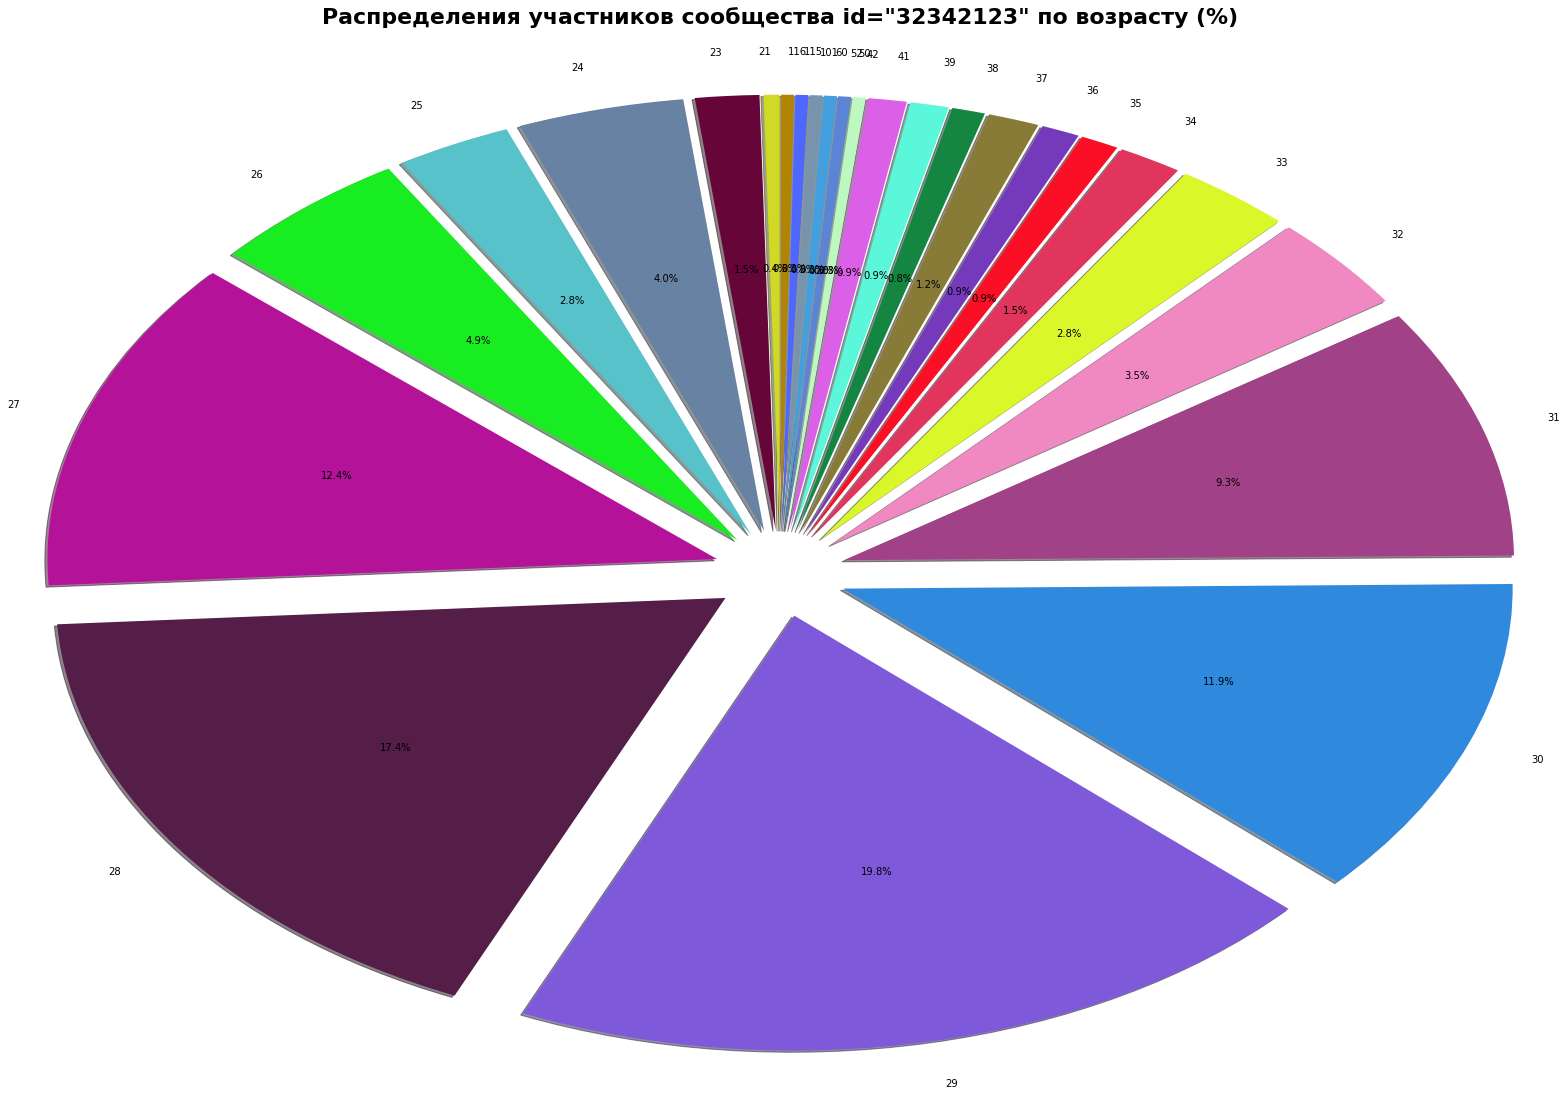

In [50]:
# Приводим к виду date(year,month,day)
bdatesDateType = [date(int(el[2]),int(el[1]),int(el[0])) for el in bdates]
# Получаем возраст
today = date.today() 
data = [(today.year - el.year - ((el.month, el.day) > (today.month,today.day))) for el in bdatesDateType]

# Строим pie
data_labels = list(set(data))
data_values = []
for el in data_labels:
    data_values.append(data.count(el))
print(data_labels,data_values, sep='\n')
cols = [(random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)) for el in range(len(data_labels))]
list1 = [0.1]*20
list2 = [0.5]*6
listik = list1.append(list2[:])
listik
#expl = tuple(listik)
plt.pie (
    data_values, labels = data_labels, radius = 5, 
    colors = cols, startangle = 90, shadow = 1, explode = expl, autopct = '%1.1f%%',
)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.title('Распределения участников сообщества id="32342123" по возрасту (%)', y=3, **font)

plt.show()



/home/rostislav/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


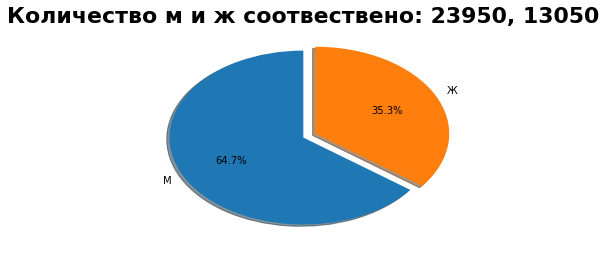

In [51]:
plt.pie (
    [males,females], 
    labels=['М','Ж'],
    shadow = 1,
    startangle = 90,
    explode = ([0,0.1]),
    autopct ='%1.1f%%'
)
plt.title('Количество м и ж соотвествено: '+ str(males) + ', ' + str(females), **font )
plt.show()